<a href="https://colab.research.google.com/github/Lufl3005/Business-Analytics/blob/main/RetoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy==3.7.6
!spacy download es_core_news_lg
!spacy download en_core_web_sm
!pip install vaderSentiment
!pip install wordcloud
!pip install numpy==1.26.0

Reason for being yanked: Incorrect compatibility for transformer models
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 15.8 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 2.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 69.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import textblob.exceptions
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nxl=open("/content/drive/MyDrive/Universidad :)/Semestre 3/Analítica de Negocios/InformeANALDEX_2020.txt").read()
nxl2=open("/content/drive/MyDrive/Universidad :)/Semestre 3/Analítica de Negocios/InformeANALDEX_2021.txt").read()
nxl3=open("/content/drive/MyDrive/Universidad :)/Semestre 3/Analítica de Negocios/InformeANALDEX_2022.txt").read()
nxl4=open("/content/drive/MyDrive/Universidad :)/Semestre 3/Analítica de Negocios/InformeANALDEX_2023.txt").read()


nxl_tk=sent_tokenize(nxl)
print(nxl_tk[:5])
nxl_tkw=word_tokenize(nxl)
print(nxl_tkw[:10])

nxl_tk2=sent_tokenize(nxl2)
print(nxl_tk2[:5])
nxl_tkw2=word_tokenize(nxl2)
print(nxl_tkw2[:10])

nxl_tk3=sent_tokenize(nxl3)
print(nxl_tk3[:5])
nxl_tkw3=word_tokenize(nxl3)
print(nxl_tkw3[:10])

nxl_tk4=sent_tokenize(nxl4)
print(nxl_tk4[:5])
nxl_tkw4=word_tokenize(nxl4)
print(nxl_tkw4[:10])

['Informe Detallado del Comercio Exterior de Colombia en 2020\n1.', 'Introducción\nEl año 2020 representó un punto de inflexión para la economía global, y Colombia no fue la excepción.', 'La irrupción de la pandemia de COVID-19 generó una crisis sanitaria sin precedentes que impactó drásticamente las cadenas de suministro, las relaciones comerciales internacionales y la demanda interna.', 'En este contexto, el comercio exterior colombiano presentó una serie de particularidades que vale la pena analizar en profundidad.', '2.']
['Informe', 'Detallado', 'del', 'Comercio', 'Exterior', 'de', 'Colombia', 'en', '2020', '1']
[' Informe Detallado del Comercio Exterior de Colombia en 2021\n\n1.', 'Introducción\n\nEl año 2021 fue un año de transición para la economía global y para Colombia.', 'Si bien la pandemia de COVID-19 continuó siendo un desafío, las medidas de vacunación y la flexibilización de las restricciones permitieron una reactivación gradual de la actividad económica.', 'En este con

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Detailed Foreign Trade Report of Colombia in 2020
1.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Introduction
The year 2020 represented a turning point for the global economy, and Colombia was no exception.
{'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'compound': -0.296}
The emergence of the Covid-19 pandemic generated an unprecedented health crisis that drastically impacted supply chains, international commercial relations and domestic demand.
{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'compound': -0.6808}
In this context, Colombian foreign trade presented a series of particularities that are worth analyzing in depth.
{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'compound': 0.2263}
2.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
The impact of Covid-19 pandemic on Colombian foreign trade
The Covid-19 pandemic had a devastating effect on the Colombian economy, causing unprecedented economic contraction since the great depression.
{'neg': 0.222, 'neu': 0.665, 'pos': 0.114, 'comp

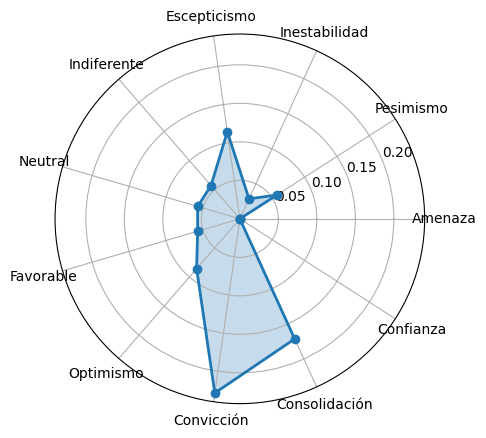

In [ ]:
nltk.download("vader_lexicon")
sia= SentimentIntensityAnalyzer()

#-------------------------------------------------------------------------------------------
#Análisis de sentimientos para el contexto 2020
XC=np.array([-1,-0.8,-.06,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
nXC=np.zeros((11,1))
Xtoks=[];Xpol=[];pos1=[]

blob=TextBlob(nxl)
tblob=blob.translate(from_lang='es',to='en')
nxl_tk=sent_tokenize(str(tblob))

for tokens in nxl_tk:
  print(tokens)
  scores=sia.polarity_scores(tokens)
  print(scores)
  Xtoks.append(tokens)
  Xpol.append(scores["compound"])
  polarity=scores["compound"]

  d=np.abs(XC-polarity)
  pos=np.where(d==np.min(d))
  nXC[pos]=nXC[pos]+1
  pos1.append(pos[0][0])

nXC=nXC/len(nxl_tk)
nXC[5,]=(nXC[4,]+nXC[6,])/2

#Crear informe en un formato Excel
dfm=pd.DataFrame(np.column_stack((Xtoks,Xpol, pos1)))
dfm.to_excel("InformeANALDEX_2020.xlsx")

#Construcción del gráfico
angles=np.linspace(0, 2*np.pi, 11, endpoint=False)
angles=np.concatenate((angles, [angles[0]]))
values=np.concatenate((nXC, [nXC[0]]))
labels=["Amenaza", "Pesimismo", "Inestabilidad","Escepticismo","Indiferente", "Neutral", "Favorable", "Optimismo", "Convicción", "Consolidación", "Confianza" ]

plt.figure()
plt.polar(angles, values, 'o-', linewidth=2)
plt.fill(angles, values, alpha=0.25)
plt.thetagrids(angles[:-1]*180/np.pi, labels)
plt.show()

Detailed Foreign Trade Report of Colombia in 2021

1.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Introduction

The year 2021 was a year of transition for the global economy and for Colombia.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Although Covid-19 pandemic continued to be a challenge, vaccination measures and the flexibility of restrictions allowed a gradual reactivation of economic activity.
{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.4019}
In this context, Colombian foreign trade presented a series of particularities that are worth analyzing in depth.
{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'compound': 0.2263}
2.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
The residual impact of COVID-19 pandemic and economy recovery

Although the Colombian economy began to recover in 2021, the effects of pandemic persisted.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Uncertainty, disruptions in supply chains and the weakness of global demand 

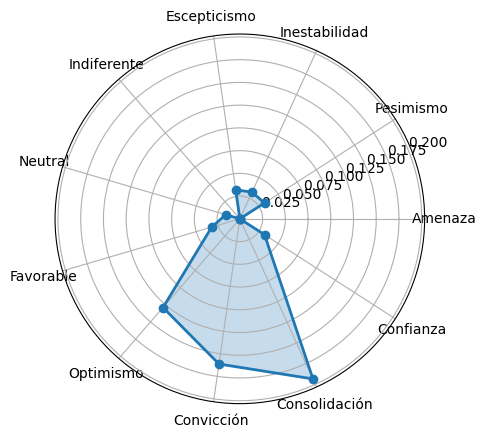

In [ ]:
#Análisis de sentimientos para el contexto 2021
blob=TextBlob(nxl2)
tblob= blob.translate(from_lang="es", to="en")
nxl_tk2=sent_tokenize(str(tblob))

#Se crea el informe
nXC2=np.zeros((11,1))
Xtoks2=[];Xpol2=[]; pos2=[]

for tokens2 in nxl_tk2:
  print(tokens2)
  scores=sia.polarity_scores(tokens2)
  print(scores)
  Xtoks2.append(tokens2)
  Xpol2.append(scores["compound"])
  polarity=scores["compound"]

  d=np.abs(XC-polarity)
  pos=np.where(d==np.min(d))
  nXC2[pos]=nXC2[pos]+1
  pos2.append(pos[0][0])

nXC2=nXC2/len(nxl_tk2)
nXC2[5,]=(nXC2[4,]+nXC2[6,])/2

#Crear informe en un formato Excel
dfm2=pd.DataFrame(np.column_stack((Xtoks2,Xpol2)))
dfm2.to_excel("InformeANALDEX_2021.xlsx")

angles=np.linspace(0, 2*np.pi, 11, endpoint=False)
angles=np.concatenate((angles, [angles[0]]))
values2=np.concatenate((nXC2, [nXC2[0]]))
labels=["Amenaza", "Pesimismo", "Inestabilidad","Escepticismo","Indiferente", "Neutral", "Favorable", "Optimismo", "Convicción", "Consolidación", "Confianza" ]

plt.figure()
plt.polar(angles, values2, 'o-', linewidth=2)
plt.fill(angles, values2, alpha=0.25)
plt.thetagrids(angles[:-1]*180/np.pi, labels)
plt.show()

Detailed Foreign Trade Report of Colombia in 2022

1.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Introduction

The year 2022 marked an important milestone in the economic recovery of Colombia, after the impacts of the Covid-19 pandemic.
{'neg': 0.0, 'neu': 0.917, 'pos': 0.083, 'compound': 0.2023}
Foreign trade, as a growth engine, played a fundamental role in this reactivation.
{'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.6124}
However, the international context, characterized by high inflation, geopolitical conflicts and disruptions in supply chains, presented new challenges for the Colombian export sector.
{'neg': 0.19, 'neu': 0.76, 'pos': 0.049, 'compound': -0.5719}
2.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
The global scenario and its impact on Colombia

The international environment in 2022 was characterized by:

High inflation: global inflation, driven by factors such as the disruption of supply chains and expansive monetary policies, impacted p

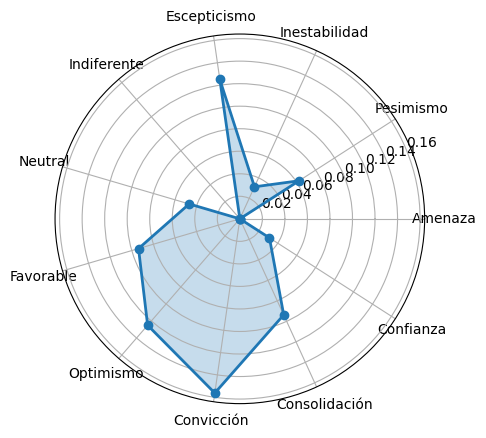

In [ ]:
#Análisis de sentimientos para el contexto 2022
blob=TextBlob(nxl3)
tblob= blob.translate(from_lang="es", to="en")
nxl_tk3=sent_tokenize(str(tblob))

#Se crea el informe
nXC3=np.zeros((11,1))
Xtoks3=[];Xpol3=[];pos3=[]

for tokens3 in nxl_tk3:
  print(tokens3)
  scores=sia.polarity_scores(tokens3)
  print(scores)
  Xtoks3.append(tokens3)
  Xpol3.append(scores["compound"])
  polarity=scores["compound"]

  d=np.abs(XC-polarity)
  pos=np.where(d==np.min(d))
  nXC3[pos]=nXC3[pos]+1
  pos3.append(pos[0][0])

nXC3=nXC3/len(nxl_tk3)
nXC3[5,]=(nXC3[4,]+nXC3[6,])/2

#Crear informe en un formato Excel
dfm3=pd.DataFrame(np.column_stack((Xtoks3,Xpol3)))
dfm3.to_excel("InformeANALDEX_2022.xlsx")

angles=np.linspace(0, 2*np.pi, 11, endpoint=False)
angles=np.concatenate((angles, [angles[0]]))
values3=np.concatenate((nXC3, [nXC3[0]]))
labels=["Amenaza", "Pesimismo", "Inestabilidad","Escepticismo","Indiferente", "Neutral", "Favorable", "Optimismo", "Convicción", "Consolidación", "Confianza" ]

plt.figure()
plt.polar(angles, values3, 'o-', linewidth=2)
plt.fill(angles, values3, alpha=0.25)
plt.thetagrids(angles[:-1]*180/np.pi, labels)
plt.show()

Detailed Foreign Trade Report of Colombia in 2023

1.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Introduction

The year 2023 marked a turning point in the economic recovery of Colombia after the onslaught of the Covid-19 Pandemia.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
However, the international context, characterized by high inflation, geopolitical conflicts and disruptions in supply chains, presented new challenges for the Colombian export sector.
{'neg': 0.19, 'neu': 0.76, 'pos': 0.049, 'compound': -0.5719}
In this report, we will analyze in depth the performance of Colombian foreign trade during this year, identifying the main trends, challenges and opportunities.
{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.4404}
2.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
The global scenario and its impact on Colombia

The international environment in 2023 was characterized by:

 High inflation: global inflation, driven by factors such as the disru

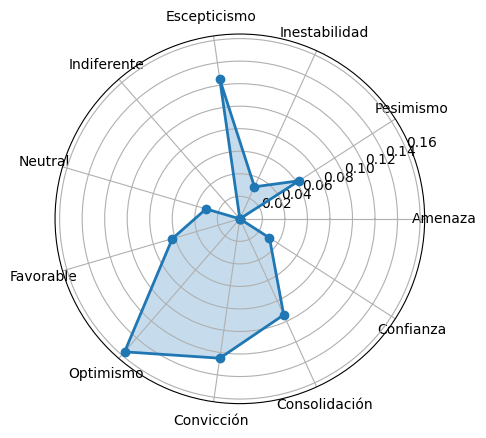

In [ ]:
#Análisis de sentimientos para el contexto 2023
blob=TextBlob(nxl4)
tblob= blob.translate(from_lang="es", to="en")
nxl_tk4=sent_tokenize(str(tblob))

#Se crea el informe
nXC4=np.zeros((11,1))
Xtoks4=[];Xpol4=[]; pos4=[]

for tokens4 in nxl_tk4:
  print(tokens4)
  scores=sia.polarity_scores(tokens4)
  print(scores)
  Xtoks4.append(tokens4)
  Xpol4.append(scores["compound"])
  polarity=scores["compound"]

  d=np.abs(XC-polarity)
  pos=np.where(d==np.min(d))
  nXC4[pos]=nXC4[pos]+1
  pos4.append(pos[0][0])

nXC4=nXC4/len(nxl_tk4)
nXC4[5,]=(nXC4[4,]+nXC4[6,])/2

#Crear informe en un formato Excel
dfm4=pd.DataFrame(np.column_stack((Xtoks4,Xpol4)))
dfm4.to_excel("InformeANALDEX_2023.xlsx")

angles=np.linspace(0, 2*np.pi, 11, endpoint=False)
angles=np.concatenate((angles, [angles[0]]))
values4=np.concatenate((nXC4, [nXC4[0]]))
labels=["Amenaza", "Pesimismo", "Inestabilidad","Escepticismo","Indiferente", "Neutral", "Favorable", "Optimismo", "Convicción", "Consolidación", "Confianza" ]

plt.figure()
plt.polar(angles, values4, 'o-', linewidth=2)
plt.fill(angles, values4, alpha=0.25)
plt.thetagrids(angles[:-1]*180/np.pi, labels)
plt.show()

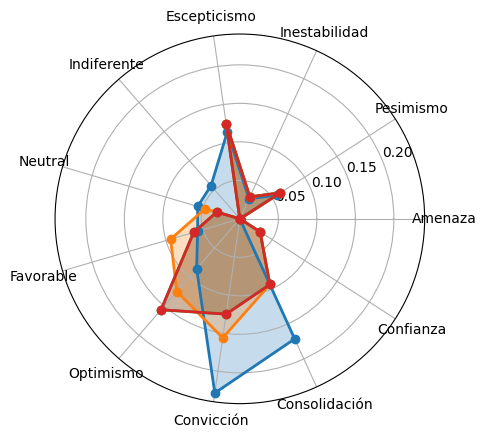

In [ ]:
#Gráfico de todos los años

angles=np.linspace(0, 2*np.pi, 11, endpoint=False)
angles=np.concatenate((angles, [angles[0]]))
values=np.concatenate((nXC, [nXC[0]]))
values1=np.concatenate((nXC2, [nXC2[0]]))
values2=np.concatenate((nXC3, [nXC3[0]]))
values3=np.concatenate((nXC4, [nXC4[0]]))
labels=["Amenaza", "Pesimismo", "Inestabilidad","Escepticismo","Indiferente", "Neutral", "Favorable", "Optimismo", "Convicción", "Consolidación", "Confianza" ]

plt.figure()
plt.polar(angles, values, 'o-', linewidth=2)
plt.polar(angles, values2, 'o-', linewidth=2)
plt.polar(angles, values3, 'o-', linewidth=2)
plt.polar(angles, values4, 'o-', linewidth=2)
plt.fill(angles, values, alpha=0.25)
plt.fill(angles, values2, alpha=0.25)
plt.fill(angles, values3, alpha=0.25)
plt.fill(angles, values4, alpha=0.25)
plt.thetagrids(angles[:-1]*180/np.pi, labels)
plt.show()

#**Análisis de resultados:**

Para el año 2024 el sentimiento que predominaba era neutral, al igual que en elaño 2022, la diferencia es que para el 2022 el sentimiento fue un poco menor.